### Student Details

Student name: Ananya Krithika Thyagarajan

Student ID:  23187123

# Description

In this task, we will use NSL-KDD dataset. We will use the NSL-KDD dataset to do multi-class classification. This dataset is quite large, and the training time can be quite long if you use the whole thing so that we will use just 20% of the dataset. If you completed the network security task in the previous activity (i.e., if you are in the BSc in CyberSecurity), you will have seen this already. For those that have not seen this dataset before, you will also be dealing with many more dimensions than you have done up to now, but you will see that the machine learning techniques we have employed up to now scale nicely to many dimensions.

The aim of the NSL-KDD dataset is to enable training a machine learning algorithm to identify different types of cyber attacks based on network trafiic features. The different attacks can be: denial-of-service (dos), Remote to user (r2l), probing attack (probe), User-to-Root (U2R). I hope this means something to the CyberSecurity cohort. For the rest of us, don't worry, we can just see it as a generic classification task.

The data is already split into training and testing. It also contains a mix of different types of features - categorical, binary, and numerical features. However, in this task, we are going to investigate only the numerical features. So, in the code just below, I have stripped out all of the non-numerical features, and provide you with the numpy arrays `train_X`, `train_Y`, `test_X`, and `test_Y`.

Our aim will be to use the available data to train an algorithm to predict the type of attack that is occurring. We will then see if we can get similar performance by using fewer features. Undoubtedly, unless there is a feature that has no influence *at all* on the output, we will see *some* degradation in performance. However, as discussed in the material, there are significant gains to be made by using fewer features.

In [7]:
####################
# CODE PROVIDED

# This code is a little bit complicated, and I don't want you to get bogged down in reading from csv files.
# This code reads from the CSV files, and creates the training and test sets for both binary and multi-class

# Read the data
import pandas as pd
test_df = pd.read_csv('KDDTest_CE4317.csv', header=0)
train_df = pd.read_csv('KDDTrain_CE4317.csv', header=0)

# Differentiating between nominal, binary, and numeric features
# Note, we only need to do this for the train data, as the train and test have the same feature names (of course)
col_names = train_df.columns.values    

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 19, 20]
numeric_idx = list(set(range(40)).difference(nominal_idx).difference(binary_idx))

numeric_cols = col_names[numeric_idx].tolist()   # The columns that have numerical features

train_Y = train_df['attack_category']
test_Y = test_df['attack_category']

# In this case, we are only going to use the numeric columns for our predictions
train_X = train_df[numeric_cols]   
test_X = test_df[numeric_cols]

print(train_X.shape)
print(test_X.shape)

(25192, 31)
(22544, 31)


Let's have a quick look at what some of the samples look like

In [8]:
# Let's look at the data
train_X

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,491,0,0,0,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,146,0,0,0,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,0,0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,232,8153,0,0,0,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,199,420,0,0,0,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
25188,0,334,0,0,0,0,0,0,0,0,...,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
25189,0,0,0,0,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
25190,0,0,0,0,0,0,0,0,0,0,...,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


And let's look quickly at how many samples in each attack category we have

Text(0, 0.5, 'Attack category')

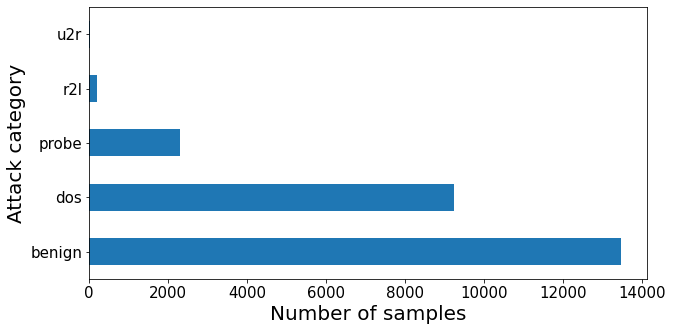

In [9]:
import matplotlib.pyplot as plt

train_attack_cats = train_df['attack_category'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()
train_attack_cats.plot(kind='barh', figsize=(10,5), fontsize=15)
plt.xlabel("Number of samples", fontsize=20)
plt.ylabel("Attack category", fontsize=20)

# Task 1- Feature Selection

### Part 1: Support Vector Classification

Here, we will use Support Vector Classification to predict the type of network attack that is occurriing, given a set of features. We will use a simple linear SVM Classification, and use the default parameters, as we're not investigating the properties of SVM, but rather the properties of data.

#### Task:
1. Apply the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to the training and test data. Remember, train on the `*_train` data, but apply to both the `*_train` and the `*_test` data
1. Train a linear Support Vector Classification, using [`sklearn`'s `svm.SVC` class](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). All parameters can be left at default except `kernel='linear'`
1. Predict the category of the network attack
1. Print the [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and the [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
1. Discuss the confusion matrix briefly

You should see that the linear SVM Classification isn't too bad. You should get an accuracy around 0.73


<span style="color:red">Insert your code below</span>.

In [10]:
from sklearn.preprocessing import StandardScaler

####################################
# Your code here
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Scale the data
STD_scaler = StandardScaler().fit(train_X)
scaled_train_X = STD_scaler.transform(train_X)
scaled_test_X = STD_scaler.transform(test_X)

# Train a linear SVM classifier
classifier = SVC(kernel='linear')
classifier.fit(scaled_train_X, train_Y)

# Predict the category of the network attack
Pred_train_Y = classifier.predict(scaled_train_X)
Pred_test_Y = classifier.predict(scaled_test_X)

The Accuracy score for Training data is:  0.9551444903143855


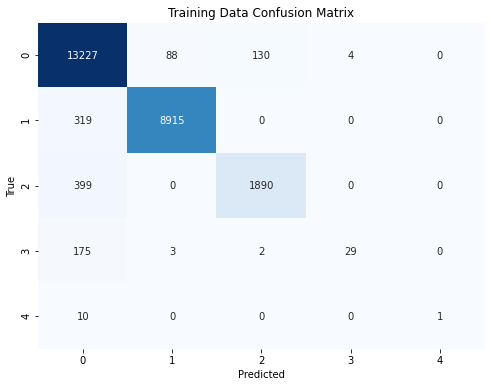

The Accuracy score for Test data is:  0.7308818310858765


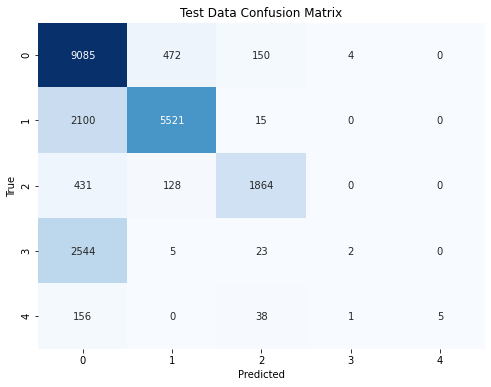

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

####################
# YOUR CODE

#calculating and finding the accuracy score and the confusion matrix
confusion_matrix_train = confusion_matrix(train_Y, Pred_train_Y)
accuracy_score_train = accuracy_score(train_Y, Pred_train_Y)

confusion_matrix_test = confusion_matrix(test_Y, Pred_test_Y)
accuracy_score_test = accuracy_score(test_Y, Pred_test_Y)

#function to plot the confusion matrix
def confusion_matrix_plot(conf_matrix, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

print("The Accuracy score for Training data is: ", accuracy_score_train)
confusion_matrix_plot(confusion_matrix_train, 'Training Data Confusion Matrix')
print("The Accuracy score for Test data is: ", accuracy_score_test)
confusion_matrix_plot(confusion_matrix_test, 'Test Data Confusion Matrix')


<span style="color:red">Insert your text answers below</span>.

According to the results, the linear Support Vector Classification (SVC) model achieved a high accuracy of around 95.5% on the training data but a lower accuracy of about 73.1% on the test data. This disparity shows that the model may have overfit the training data, which means it did well on the data it was trained on but less well on fresh, previously unseen data.

The confusion matrices provide more specific information about the performance of the model. We can observe from the training data confusion matrix that the model made relatively few errors, with the majority of the entries focused along the diagonal, which signifies correct classifications. However, there are more off-diagonal entries in the test data confusion matrix, indicating that the model committed more errors on the test data.

One probable explanation for the reduced test accuracy is class imbalance, which occurs when some categories contain more samples than others. As a result, the model may be biassed towards the dominant class, resulting in lower accuracy for minority classes. Another explanation for poorer accuracy could be if the test data comprises samples that are significantly different from the training data.

While the linear SVC model performed well on training data, its performance on test data implies that there is still potential for improvement. More analysis and fine-tuning of the model, such as tweaking the hyperparameters or experimenting with other feature engineering techniques, could help it perform better on the test data.

### Part 2: Feature Variance

Feature variance is a rather simple way of predicting if a given feature will have influence on the outcome of a trained model. The principle is that, if a feature has low variance, it cannot have much influence on the model prediction. As an extreme, if we have a variance of 0 in a feature across all samples, i.e. we have the same value for this feature in all samples, then this feature cannot be used to distinguish samples and is useless as a predictor.

However, the converse is not true. A high variance in a feature does not necessarily mean that it is a good predictor. You could imagine a feature that just contains noise with high amplitude. It might have high variance, but is meaningless. Or you can have a feature that has high variance but no influence on the outcome. For example, would hair length in cm have any influence on a baseball players salary? That said, variance can be a useful measure of the strength of a predictor.

The variance of a set of features is given by:

$$
S_{i}^{2} = \frac{\sum_{j=1}^n\left(\textbf{X}_{i,j} - \overline{\textbf{X}}_i \right)^2}{n - 1}
$$

where $\textbf{X}_{i,j}$ is the $j$'th sample of the $i$'th feature, $\overline{\textbf{X}}_i$ is the mean of all the samples of the $i$'th feature, and $n$ is the total number of samples.

Variance thresholding doesn't examine the relationship between the feature $\textbf{X}$ and the output $\textbf{y}$. This has the disadvantage that you can't test if the feature actually has an influence on the output. However, even though in this case we use it in a supervised learning context, it does mean that we can use variance thresholding for unsupervised learning.

#### Notes:
1. In Part 1, we used the `StandardScaler` to scale the features. In general, this is good practice, and in the next Task where we look at PCAs, really is even required. The `StandardScaler` will make it so every feature has a variance of 1 (unless the features started out with a variance of 0 to begin with) and a mean of 0. Therefore, features scaled with `StandardScaler` are useless for thresholding on variance, as there is no practical way to distinguish them.
2. However, we should not do `VarianceThreshold`ing on just the raw data. Have a look at the values in the training dataset. Some columns will have typically small values. It is the nature of that data, and even though they may have a large influence on the type of attack, they will have a lower variance compared to some of the other columns.
3. So we must scale, but not using the `StandardScaler`. Here it is more appropriate to use the [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), which scales all the data to the range 0 to 1 by default (though you can set any range).
4. Note that `MinMaxScaler` can also be applied to machine learning algorithms. Just in this case, we want to use the `StandardScaler`. There is, in fact, a [whole suite of other scalers provided by scikit-learn](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html). Each has it's own benefits. In fact, some would say we should use `MinMaxScaler` as the default scaler, and only use `StandardScaler` if we know the distribution of the data is normal.

#### Task:
1. Fit an instance of the `MinMaxScaler` with the original `X_train` data. You will get a set of data in the range 0 to 1.
2. It is not very intuitive what threshold of variance we should use. So it's better to plot the variances of each feature, and then decide if some of the variances are small enough to discard
3. Use `np.var` function to calculate the variances of the features (`axis-0`). Plot the variances, and pick a value that might remove 3 or 4 of the features.
4. Fit the output of the `MinMaxScaler` using an object of [`sklearn.feature_selection`'s `VarianceThreshold` class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) using this threshold
5. `transform` the data that was scaled with the `StandardScaler`. This is an important step. Notice that we use the output of the `MinMaxScaler` to select the features, but the data we want to use is selected from the `StandardScaler`.
6. Repeat the steps of Part 1: Train an SVC with the selected features and print the accuracy.
7. How does the accuracy compare to the the SVC with no features removed (from Part 1)?

<span style="color:red">Insert your code below</span>.

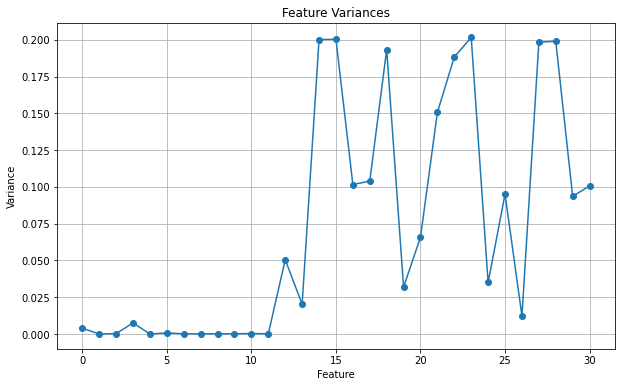

In [12]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

####################################
# Your code here
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
import numpy as np

# Fiting an instance of the MinMaxScaler with the original train data
minmax_scaler = MinMaxScaler()
minmax_train_X = minmax_scaler.fit_transform(train_X)

# Calculating the variances of the features
var_minmax = np.var(minmax_train_X, axis=0)

# Plotting the variances
plt.figure(figsize=(10, 6))
plt.plot(var_minmax, 'o-')
plt.xlabel('Feature')
plt.ylabel('Variance')
plt.title('Feature Variances')
plt.grid(True)
plt.show()



In [13]:
from sklearn.svm import SVC

# Set a threshold for the variance
threshold = 0.04
selector_var = VarianceThreshold(threshold=threshold)

# Fiting and transformation of the data with the VarianceThreshold
selected_train_X = selector_var.fit_transform(minmax_train_X)

# Transforming the data scaled with the StandardScaler
std_scaler = StandardScaler()
selected_train_X_scaled = std_scaler.fit_transform(selected_train_X)

# Training an SVC with the selected features 
selected_clf = SVC(kernel='linear')
selected_clf.fit(selected_train_X_scaled, train_Y)

# Predicting the category of the network attack
selected_train_Y_pred = selected_clf.predict(selected_train_X_scaled)
selected_test_X = selector_var.transform(minmax_scaler.transform(test_X))
selected_test_X_scaled = std_scaler.transform(selected_test_X)
selected_test_Y_pred = selected_clf.predict(selected_test_X_scaled)

# Evaluating the performance of the model
selected_train_accuracy = accuracy_score(train_Y, selected_train_Y_pred)
selected_test_accuracy = accuracy_score(test_Y, selected_test_Y_pred)

selected_train_accuracy, selected_test_accuracy



(0.9347808828199429, 0.6963271823988645)

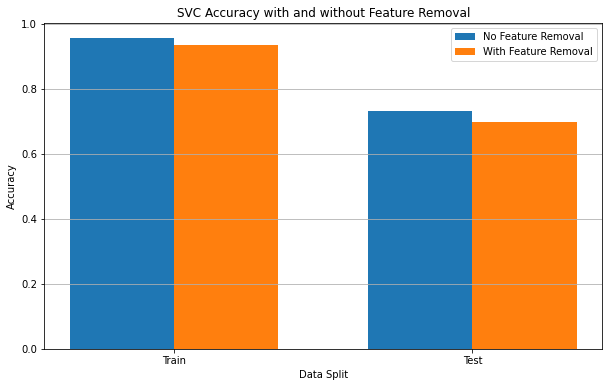

In [16]:
#

# Ploting the camparison of the accuracy scores
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
bar_labels = ['Train', 'Test']
bar1 = [accuracy_score_train, accuracy_score_test]
bar2 = [selected_train_accuracy, selected_test_accuracy]

bar1_pos = np.arange(len(bar_labels))
bar2_pos = bar1_pos + bar_width

plt.bar(bar1_pos, bar1, width=bar_width, label='No Feature Removal')
plt.bar(bar2_pos, bar2, width=bar_width, label='With Feature Removal')

plt.xlabel('Data Split')
plt.ylabel('Accuracy')
plt.title('SVC Accuracy with and without Feature Removal')
plt.xticks(bar1_pos + bar_width / 2, bar_labels)
plt.legend()
plt.grid(axis='y')

plt.show()

<span style="color:red">Insert your text answers below</span>.

The observed decrease in accuracy after feature removal by variance thresholding is illustrative of the complexity of feature selection. We may expect that deleting features with low variance would streamline the model, removing duplicate or non-informative data and thus improving the model's generalisation. The decrease in both training and test accuracies, on the other hand, implies a different scenario.

The minor decrease in training accuracy, from 95.51% to 93.48%, was expected. It suggested that the features deleted were not necessary for the model to learn from the training data. The more noticeable reduction in test accuracy, from 73.08% to 69.63%, indicates a more serious problem. It implies that, despite their low variance, the eliminated traits were useful in forecasting unseen events. This could imply that, despite not altering greatly throughout the dataset, these traits were nonetheless important in defining the borders between distinct types of network attacks.

This result serves as a reminder that the value of a model feature is not entirely determined by its variance. Some low variance characteristics may still play an important role in a model's prediction accuracy, especially when the interactions between features are complicated and not linearly separable, as is frequently the case in real-world datasets.

The findings also highlight the significance of a sophisticated approach to feature selection. Finding features with high variance or direct correlations with the target variable isn't usually the goal. Instead, it is necessary to comprehend the underlying data structure and how each characteristic contributes to the prediction task at hand. Iterative processes should be used, with careful consideration given to how changes in the feature set affect model performance.

In light of these findings, more research into feature selection approaches that take into account the link between features and the target variable is recommended. Experimenting with alternative variance thresholds and investigating other models may also reveal a better balance between model complexity and forecast accuracy. The ultimate goal is to build a model that captures the fundamental patterns in the data while avoiding noise and excessive complexity.







### Part 3: Univariate Feature Selection - `f_classif`

Univariate feature selection works by performing statistical tests on each of the features (i.e. on each column in our dataset). There are a [few options provided by `scikit-learn`](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection). We will use the [`SelectKBest` functionality](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html), which allows us to pick "the top" `K` features per the metric we select. To pick the top features, we will use the [`f_classif` function](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html), as we are doing a classification. `f_classif` uses the ANOVA F-value to determine features to select. More info on ANOVA is available [here](https://datascience.stackexchange.com/questions/74465/how-to-understand-anova-f-for-feature-selection-in-python-sklearn-selectkbest-w).

The `SelectKBest` functionality coupled with `f_classif`, will use this score to pick the `K` top features.

#### Task:
1. Loop over the total count of features (i.e. for variable `k` from 1 to 31)
2. Use the [`SelectKBest` class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) with [`f_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html) to pick the top `k` features from our dataset
3. Train a new SVM classification with features transformed with the `SelectKBest` object you just created (note: both train and test data have to be transformed)
4. Use the `accuracy_score` function to get the accuracy at each iteration
5. Repeat steps 2 to 4 for each value of `k`.
6. Then plot the accuracy versus number of features in a single plot
7. Given this data, discuss the number of features you might use in a final solution? (Use markdown - no wrong answer here)
8. How doe the "best" accuracy value compare with the SVM before removing any features? 

this will take a few minutes to run, go get a coffee!

<span style="color:red">Insert your code below</span>.

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

####################################
# Your code here


scalerSTD = StandardScaler()
train_Xscaled = scalerSTD.fit_transform(train_X)
test_Xscaled = scalerSTD.transform(test_X)

# Initializing lists to hold the accuracy scores
train_accuracy_list = []
test_accuracy_list = []

# loop for the count of features
for k in range(1, train_Xscaled.shape[1] + 1):
    # Selecting the top k features
    selector_KB = SelectKBest(f_classif, k=k)
    train_X_kbest = selector_KB.fit_transform(train_Xscaled, train_Y)
    test_X_kbest = selector_KB.transform(test_Xscaled)

    # Training and evaluating the SVM classifier
    clf2 = SVC(kernel='linear')
    clf2.fit(train_X_kbest, train_Y)
    pred_train_Y = clf2.predict(train_X_kbest)
    pred_test_Y = clf2.predict(test_X_kbest)

    # Calculating the accuracies
    accuracy_train = accuracy_score(train_Y, pred_train_Y)
    accuracy_test = accuracy_score(test_Y, pred_test_Y)
    train_accuracy_list.append(accuracy_train)
    test_accuracy_list.append(accuracy_test)


# Find the best accuracy and the corresponding number of features
best_numfeatures = np.argmax(test_accuracy_list) + 1
best_accuracy = test_accuracy_list[best_numfeatures - 1]

print(f"The best test accuracy is {best_accuracy:.4f} with {best_numfeatures} features.")

The best test accuracy is 0.7309 with 31 features.


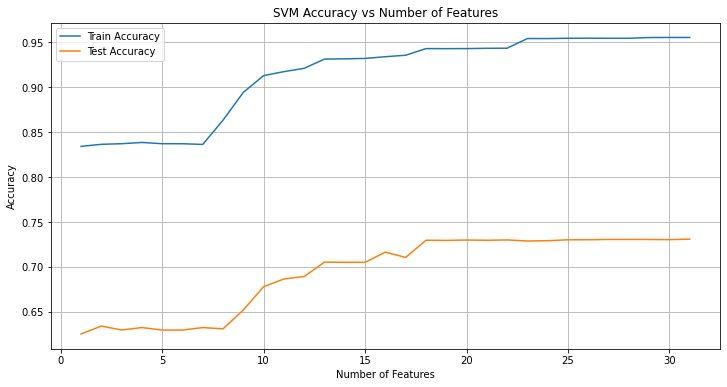

In [18]:
import matplotlib.pyplot as plt

####################################
# Your code here
# Ploting the results
plt.figure(figsize=(12, 6))
plt.plot(range(1, train_Xscaled.shape[1] + 1), train_accuracy_list, label='Train Accuracy')
plt.plot(range(1, train_Xscaled.shape[1] + 1), test_accuracy_list, label='Test Accuracy')
plt.title('SVM Accuracy vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

<span style="color:red">Insert your question answers below</span>.

**Given this data, discuss the number of features you might use in a final solution?** 

The results indicate that including all 31 criteria results in the highest test accuracy. This shows that each feature provides information to the model's predicted accuracy, and there don't appear to be any duplicate or unneeded characteristics that can be deleted without harming performance.

Several factors must be considered while calculating the ideal amount of features for a final model:

1. Model Complexity: 
A model with fewer characteristics is simpler, faster to train, and easier to comprehend. However, if reducing features leads in a significant fall in accuracy, the simplification may not be justified.

2. Overfitting Risk: 
A larger number of features increases the likelihood of the model overfitting to the training data. However, because the maximum accuracy is obtained with the entire collection of features, this does not appear to be an immediate worry with the supplied dataset.

3. Computational Resources: 
Training with fewer features can save computing resources as well as time. If computational capacity is restricted or the model must be deployed in a resource-constrained context, lowering the number of features may be necessary, provided the accuracy loss is within acceptable boundaries.

4. Feature value: 
Assessing the value of each feature may reveal that just a selection of features significantly adds to the model's predictive capability. Identifying such a subset allows for dimensionality reduction without a significant decline in model performance.

Given that all 31 characteristics provide the best accuracy, it seems reasonable to incorporate all features in the final model, unless there are specific limits regarding model complexity or computing performance. If near-maximum accuracy can be maintained with fewer features, a lower feature set may be preferable to profit from a simpler model.

Further research into feature importance, using approaches other than simple univariate selection, could provide deeper insights into which features have the most impact on predictions, allowing for a more educated feature selection process for the final model.





**How doe the "best" accuracy value compare with the SVM before removing any features?**

The "best" accuracy obtained with 31 features, 0.7309, is essentially the performance of the SVM without any features removed. Because all features were maintained in this context, no feature reduction technique was used prior to attaining this best accuracy value.

This result suggests that the model works best with the full set of characteristics provided, and any attempt to limit the feature set (using the current feature selection approach) has not resulted in an improvement in accuracy. Maintaining all 31 features would thus be the preferred method for this SVM model in the absence of overfitting or computing restrictions.




# Task 2: Dimensionality Reduction via PCA

PCA is one of the most commonly used unsupervised transforms, and one of the most commmon means to manipulate data for machine learning. You touched on the PCA in E-tivity 2, where we investigated linear algebra. Here we will use it to reduce the numbers of features needed for a machine learning algorithm.

In the last task, we removed features. The first part, we just used some statistics on the features themselves, in independence of the other features and of the output. Then, we looked at the correlation between features and the output. 

What PCA does is look at correlations *between features*. If we have high correlation between two or more features, PCA will find vectors in the feature space that best describe all features. It doesn't remove features, rather it creates a new feature space, and projects all samples to this feature space. The basis of the new feature space is a linear combination of the original features. Maybe a bit crudely, you can think of it as combining features.

Let's look at an example. Here is the first few rows of the dataset.

In [19]:
train_df.head(8)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,attack_binary
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,benign,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,benign,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,benign,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,benign,0
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,dos,1
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,1
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,dos,1


Ok, so in a small handfull of features, we can spot that (perhaps) `num_root` and `num_compromised` are correlated? Let's plot a few of them that might be correlated.

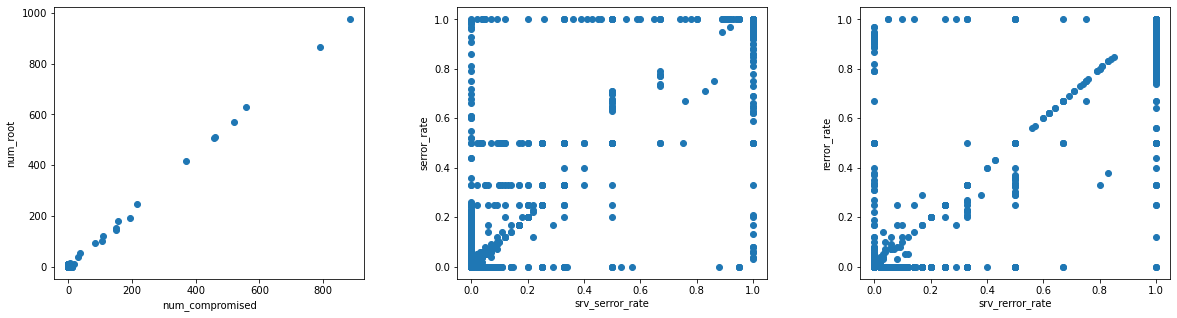

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.subplots_adjust(wspace=0.3)

ax[0].scatter(train_df['num_compromised'], train_df['num_root']);
ax[0].set(xlabel='num_compromised', ylabel='num_root')

ax[1].scatter(train_df['srv_serror_rate'], train_df['serror_rate']);
ax[1].set(xlabel='srv_serror_rate', ylabel='serror_rate')

ax[2].scatter(train_df['srv_rerror_rate'], train_df['rerror_rate']);
ax[2].set(xlabel='srv_rerror_rate', ylabel='rerror_rate')

plt.show()

Note that the last two plots, while there are outliers in the plots (values at 1.0), most of the data lies along the diagonal. Just the drawing doesn't show this well, though it is highly correlated.

Yes, we can see that there is some correlation between the features we selected here. We can probably assume that there is a causal relationship between them - CyberSecurity specialists wish to comment?

So there is certainly some redundancy here. And likely there are more hidden correlations that we don't know about!

# Task

On to this weeks task. We will perform PCA on the data, before training a linear SVM, and explore some more properties of it, and how it affects the machine learning algorithm.

1. Run [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on the standard scaled data. Initially, set the desired variance to keep to 95% (`n_components=0.95`, all other parameters set to default)
2. Train a Support Vector Classification on the PCA reduced data. As with Task 1, use a linear SVM and keep all other parameters as default
3. Try 99% and 90%
4. Play around with desired variance to see if you can reduce the number of features while maintaining an accuracy close to the original dataset above

Discuss the following points, and compare with the previous task in this e-tivity:

1. How many new features are there after the PCA?
2. Discuss the "goodness" of the model, compared with the one without scaling (from Task 1), by comparing the accuracy
3. How about if we set the variance to 99%? And how about 99.9%?
4. Can you get better accuracy with fewer features using PCA compared to dropping the features from Task 1?

Note that the parameter `n_components` of `PCA` can take either a real value between 0 and 1, in which case it will pick the number of components that maintains that level of variance in the samples, or it can take an integer value, in which case it will keep that number of components.

<span style="color:red">Insert your code below</span>.

In [27]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
####################################
# Your code here


scaler = StandardScaler()
train_X_scaled2 = scaler.fit_transform(train_X)
test_X_scaled2 = scaler.transform(test_X)

# define a Dictionary to store the pca results
pca_res = {}

# defing a function to perform PCA and train SVM
def perform_PCA_and_eval(var):
    pca = PCA(n_components=var)
    train_Xpca = pca.fit_transform(train_X_scaled2)
    test_Xpca = pca.transform(test_X_scaled2)

    # Training SVM
    svm = SVC(kernel='linear')
    svm.fit(train_Xpca, train_Y)
    
    # Predicting and evaluating
    predict = svm.predict(test_Xpca)
    accuracy = accuracy_score(test_Y, predict)
    conf_matrix = confusion_matrix(test_Y, predict)
    
    # Calculating the cumulative sum of the explained variance ratio
    cumulative_var = np.cumsum(pca.explained_variance_ratio_)
    return pca.n_components_, accuracy,conf_matrix,cumulative_var



In [25]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

####################################
# Your code here

# Evaluating different variances
for var in [0.95, 0.99, 0.90]:
    n_comp, accur, conf_mat = perform_PCA_and_eval(var)
    pca_res[var] = {
        'n_components': n_comp,
        'accuracy': accur
    }

# Trying different variances to find the best number of components
try_variances = np.arange(0.95, 0.50, -0.01)
for variance in try_variances:
    n_comp2, accur2, conf_mat2 = perform_PCA_and_eval(variance)
    pca_res[variance] = {
        'n_components': n_comp2,
        'accuracy': accur2
    }

# Finding the optimal number of components
optimal_var = max(pca_res.items(), key=lambda x: x[1]['accuracy'])[0]
optimal_comp = pca_res[optimal_var]['n_components']
optimal_accur = pca_res[optimal_var]['accuracy']


print(f"Optimal variance: {optimal_var}, Number of components: {optimal_comp}, Accuracy: {optimal_accur}")


Optimal variance: 0.99, Number of components: 23, Accuracy: 0.7302164655784245


Confusion Matrix:
[[9110  441  160    0    0]
 [2248 5346   42    0    0]
 [ 360  154 1909    0    0]
 [2554    2   18    0    0]
 [ 191    0    0    0    9]]


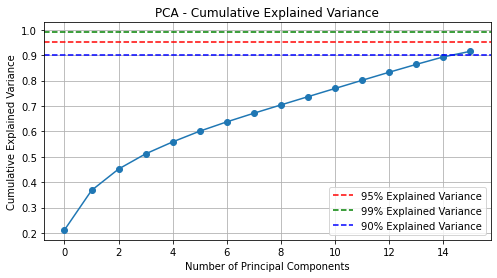

In [28]:
####################################
# Your code here

print("Confusion Matrix:")
print(conf_mat)


for var in [0.95, 0.99, 0.90]:
    n_comp3, accur3, conf_mat3, cum_var = perform_PCA_and_eval(var)

# Ploting the cumulative explained variance
plt.figure(figsize=(8, 4))
plt.plot(cum_var, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.title('PCA - Cumulative Explained Variance')

# Draw lines for 95%, 99%, and 90% variance thresholds
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.axhline(y=0.99, color='g', linestyle='--', label='99% Explained Variance')
plt.axhline(y=0.90, color='b', linestyle='--', label='90% Explained Variance')
plt.legend(loc='best')

# Show the plot
plt.show()


<span style="color:red">Insert your text answers below</span>.



**1. How many new features are there after the PCA?**

**Ans:** 
There are 23 new features after using PCA with a variance of 99%. These are the primary components identified by PCA as accounting for 99% of the variance in the dataset.
Discuss the model's "goodness" in comparison to the one without scaling (from Task 1) by comparing the accuracy.

**2. Discuss the "goodness" of the model, compared with the one without scaling (from Task 1), by comparing the accuracy**

**Ans:** 
At a 99% variance threshold, the accuracy with PCA is 0.7302, which is very similar to the accuracy reached in Task 1 with all original features (which was around 0.7309). This implies that the PCA-transformed model has roughly the same "goodness" or predictive performance as the original model while employing less characteristics (23 instead of 31). This can benefit model simplicity and potentially reduce overfitting while keeping the majority of the model's predictive effectiveness.


**3. How about if we set the variance to 99%? And how about 99.9%?**

**Ans:** 
Setting the variance to 99% produced 23 features with an accuracy of 0.7302, as previously stated. If the variance is set to 99.9%, the number of features will almost certainly increase because more components will be required to capture that more variance. The accuracy may improve slightly, but this must be checked by actual findings. However, the trade-off between a small increase in accuracy and the extra complexity of new features must be considered.


**4. Can you get better accuracy with fewer features using PCA compared to dropping the features from Task 1?**

**Ans:** 
In Task 1, the accuracy with the smaller feature set was lower than with the full set following feature selection. Using PCA with 99% variance kept, however, the accuracy remains near to that of the full feature set with all original features, despite the fact that fewer features (23 instead of 31) are used. This suggests that PCA may be a more effective strategy for reducing features while maintaining high model accuracy. Rather than merely deleting individual features based on variance thresholds or univariate statistics, it compresses the information into fewer features by merging the original features into main components that reflect the majority of the variability in the data.

# Task 3: Exploration

Data engineering is a critical component of the machine learning environment, offering the structure and operational prowess required to collect, handle, and analyse large amounts of data. Here's an overview of its significance:


**Experimentation and Versioning:**

Data engineering facilitates the reproducibility of machine learning experiments, which is critical for validating and disseminating results. It also facilitates collaborative efforts by monitoring changes and maintaining a model development history.

**Feature Stores:**

Data engineering ensures consistent access to pre-computed features for training and inference by constructing feature stores, boosting the speed and reliability of model development and deployment.

**Data Labeling:**

Quality Training Data and Scalability: Properly labelled data is the foundation of supervised machine learning models, and data engineering provides the tools and methods for quickly and at scale labelling data.

**Data Security:**

Trust and Compliance: Ensuring data security fosters user trust and aids in the compliance with severe data protection rules, reducing legal risks and improving the integrity of machine learning systems.

**Metadata Management:**

Contextual Understanding and Problem Solving: Managing metadata enables for a more in-depth understanding of data sources and makes debugging data pipeline difficulties easier.

**Cost Optimization:**

Data engineering optimises the cost of data operations, allowing for long-term model training and deployment while ensuring that resources are used properly.

**Data Lifecycle Management:**

Compliance, Risk Management, and Data Relevance: Effective data lifecycle management guarantees compliance with data retention policies, eliminates data management risks, and keeps datasets relevant for analytical reasons.

**Model Serving Infrastructure:**

Scalability, availability, and latency: A robust model serving infrastructure is critical to ensure that machine learning models can scale to meet demand and produce low-latency predictions, which are required for real-time applications.

**Monitoring and Observability:**

Continuous monitoring of models and data pipelines enables for the quick diagnosis and correction of performance issues or anomalies, ensuring the quality of machine learning outputs.

**Ethical Considerations:**

Fairness and Social Impact: Data engineering is crucial in discovering and eliminating biases within datasets, ensuring that machine learning models are fair and do not unintentionally violate society norms


The interplay of these factors highlights the diverse function that data engineering fulfils inside the machine learning ecosystem. To enable trustworthy, effective, and moral artificial intelligence systems, data must be shaped rather than merely being fed into algorithms. By supplying high-quality, well-prepared data and making sure the infrastructure supports the whole machine learning lifecycle, data engineering improves the intelligence of machine learning models. This is the unsung hero that helps data scientists to get the most value out of the data; it covers everything from the first data collection to the last model deployment and monitoring.